Example from: https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

C:\Users\plubi\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Hyperparameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Inputs
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Parameters
W = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")

In [5]:
# Linear regression model
y_ = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(y_-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.107756063 W= 0.3477802 b= 0.09511911
Epoch: 0100 cost= 0.104197167 W= 0.34194055 b= 0.13712892
Epoch: 0150 cost= 0.101049520 W= 0.33644822 b= 0.17664027
Epoch: 0200 cost= 0.098265588 W= 0.33128253 b= 0.21380165
Epoch: 0250 cost= 0.095803380 W= 0.32642415 b= 0.24875294
Epoch: 0300 cost= 0.093625754 W= 0.32185468 b= 0.28162557
Epoch: 0350 cost= 0.091699809 W= 0.31755695 b= 0.3125434
Epoch: 0400 cost= 0.089996576 W= 0.31351486 b= 0.34162137
Epoch: 0450 cost= 0.088490210 W= 0.3097131 b= 0.3689706
Epoch: 0500 cost= 0.087157972 W= 0.30613753 b= 0.39469394
Epoch: 0550 cost= 0.085979842 W= 0.3027746 b= 0.41888627
Epoch: 0600 cost= 0.084937967 W= 0.29961178 b= 0.44163978
Epoch: 0650 cost= 0.084016584 W= 0.29663682 b= 0.46304068
Epoch: 0700 cost= 0.083201766 W= 0.29383895 b= 0.48316905
Epoch: 0750 cost= 0.082481258 W= 0.29120743 b= 0.5020994
Epoch: 0800 cost= 0.081844136 W= 0.2887325 b= 0.51990384
Epoch: 0850 cost= 0.081280701 W= 0.2864047 b= 0.5366499
Epoch: 0900 cost= 0.080

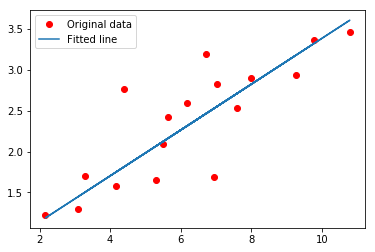

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Plot the results
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

Tasks:
1. Try reducing the learning rate to 0.00001. How does it affect the training?
2. Try increasing the learning rate to 1. What happens?